In [930]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [931]:
pax = pd.read_csv("arrival_profile_data.csv", usecols=['ts', 'pax_arrival_profile'], parse_dates=True)

In [932]:
pax['ts'] = pd.to_datetime(pax['ts']).dt.tz_localize(None)
pax['ts'] = pax['ts'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [933]:
pax.set_index('ts', inplace=True)

In [925]:
slice_size = 300
slices = [pax[i:i+slice_size] for i in range(0, len(pax), slice_size)]

In [926]:
slices_count = len(slices)

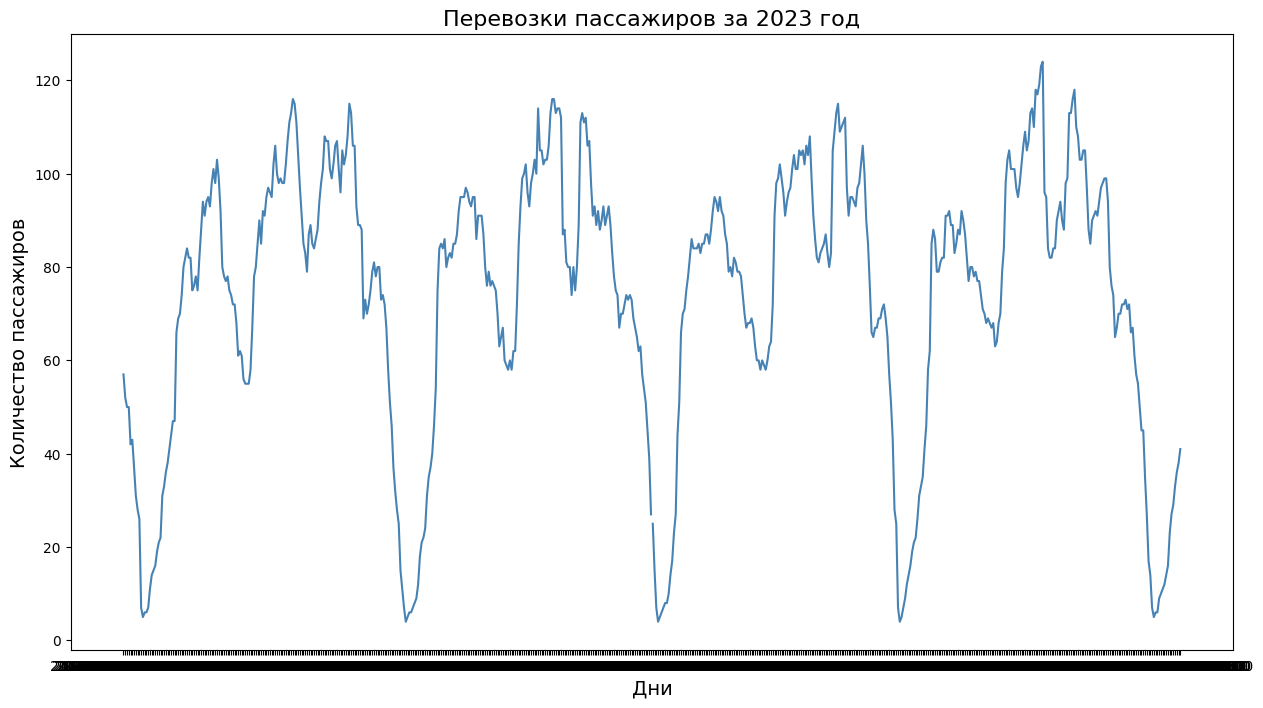

In [927]:
plt.figure(figsize = (15,8))

for i in range(2):
    plt.plot(slices[i], color = 'steelblue')

plt.xlabel('Дни', fontsize = 14)
plt.ylabel('Количество пассажиров', fontsize = 14)
plt.title('Перевозки пассажиров за 2023 год', fontsize = 16)

plt.show()

In [928]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

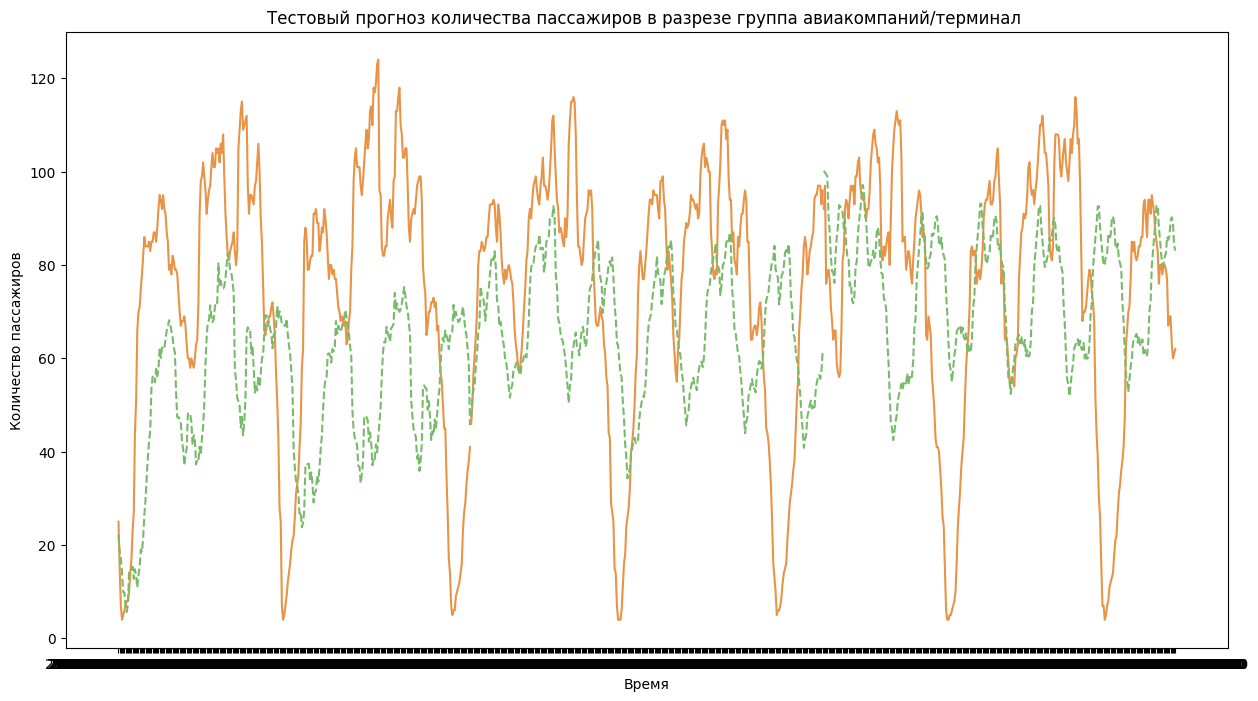

In [929]:
plt.figure(figsize=(15,8))

for i in range(3):
    model = SARIMAX(slices[i], order = (2, 0, 0), seasonal_order = (2, 1, 0, 50))
    result = model.fit()
    
    start = len(slices[i])
    end = len(slices[i]) + len(slices[i+1]) - 1
    
    predictions = result.predict(start, end)
    
    df_predictions = slices[i+1].copy()
    predictions.index = df_predictions.index
    df_predictions['pax_arrival_profile'] = predictions

#    plt.plot(slices[i], color = '#e99347')
    plt.plot(slices[i+1], color='#e99347')
    plt.plot(df_predictions, linestyle='--', color='#77bb6a', )
    
    plt.title("Тестовый прогноз количества пассажиров в разрезе группа авиакомпаний/терминал ")
    plt.ylabel('Количество пассажиров')
    plt.xlabel('Время')

plt.show()